In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
diabetes=pd.read_csv(r'C:\Users\ADMIN\Desktop\Datascience Class\Notebook\diabetes.csv')

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.columns

Index(['Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [5]:
x=diabetes.drop(' Class variable',1)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_8140/3313176352.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=diabetes.drop(' Class variable',1)


In [6]:
x

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y=diabetes.iloc[:,-1]

In [8]:
y

0      YES
1       NO
2      YES
3       NO
4      YES
      ... 
763     NO
764     NO
765     NO
766    YES
767     NO
Name:  Class variable, Length: 768, dtype: object

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [10]:
x_train

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
596,0,67,76,0,0,45.3,0.194,46
90,1,80,55,0,0,19.1,0.258,21
734,2,105,75,0,0,23.3,0.560,53
694,2,90,60,0,0,23.5,0.191,25
517,7,125,86,0,0,37.6,0.304,51
...,...,...,...,...,...,...,...,...
360,5,189,64,33,325,31.2,0.583,29
709,2,93,64,32,160,38.0,0.674,23
439,6,107,88,0,0,36.8,0.727,31
174,2,75,64,24,55,29.7,0.370,33


#### Modelling 

In [11]:
model=GaussianNB()

In [12]:
model.fit(x_train,y_train)

GaussianNB()

#### Prediction

In [13]:
y_predict=model.predict(x_test)

#### Model Metrics

In [14]:
acc_score=accuracy_score(y_test,y_predict)

In [15]:
acc_score

0.7597402597402597

#### Confusion Matrix 

In [16]:
confusion_matrix?


In [17]:
confusion_matrix(y_test,y_predict)

array([[83, 19],
       [18, 34]], dtype=int64)

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          NO       0.82      0.81      0.82       102
         YES       0.64      0.65      0.65        52

    accuracy                           0.76       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [19]:
#!pip install yellowbrick

In [20]:
#!pip install -U scikit-learn

In [26]:
from yellowbrick.classifier import ConfusionMatrix
cm=ConfusionMatrix(model,classes=['NO','YES'])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


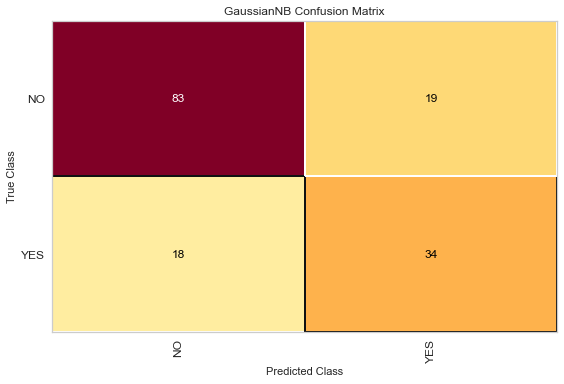

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
cm.fit(x_train,y_train)
cm.score(x_test,y_test)
cm.show()